In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("supply_chain_data.csv")
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [3]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [4]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [5]:
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

Now lets get started  with analyzing the supply chain by looking at the relationship b/w the price of the products and the revenue generated by them:

C:\Users\PC\AppData\Local\Temp\ipykernel_13988\1471348075.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(product_df['Price'],product_df['Revenue generated'],c=color_map[product_type],label=product_type)


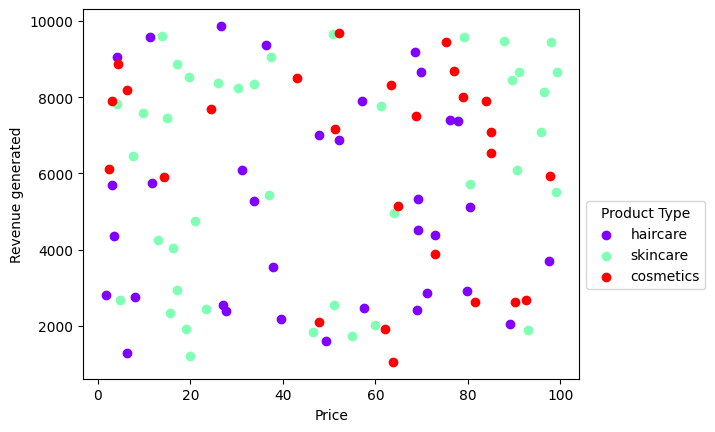

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
product_types = df['Product type'].unique()
colors = plt.cm.rainbow(np.linspace(0,1,len(product_types)))
color_map = dict(zip(product_types,colors))
df['color'] =df['Product type'].map(color_map)
plt.xlabel('Price')
plt.ylabel('Revenue generated')

for product_type in product_types:
    product_df = df[df['Product type']==product_type]  

    plt.scatter(product_df['Price'],product_df['Revenue generated'],c=color_map[product_type],label=product_type) 
plt.legend(title='Product Type', loc='upper left', bbox_to_anchor=(1,0.5))    
plt.show()                

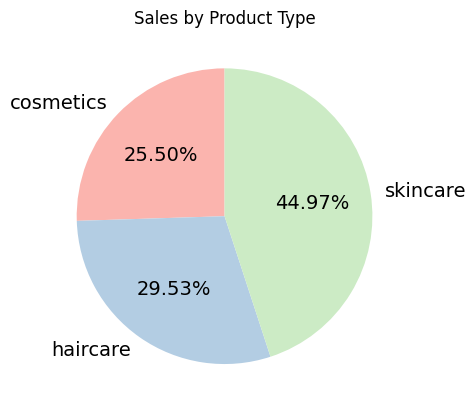

In [43]:
import matplotlib.pyplot as plt
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()
pie_chart = plt.pie(sales_data['Number of products sold'] ,labels=sales_data['Product type'],
                    autopct='%1.2f%%',startangle=90,textprops={'fontsize': 14},
                    colors=plt.cm.Pastel1(range(len(sales_data))))
plt.title("Sales by Product Type")
                    
plt.show()

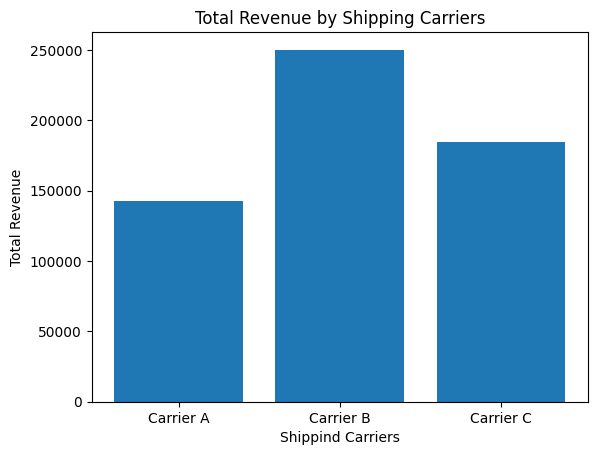

In [48]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
plt.bar(total_revenue['Shipping carriers'],total_revenue['Revenue generated'])
plt.xlabel('Shippind Carriers')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Shipping Carriers')
plt.show()

lets have look at the average lead time and average manufacturing costs for all products of the company:

In [51]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time,avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time':'Average Lead Time','Manufacturing costs':'Average Manufacturing Costs'},inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


ANALYZING SKUs

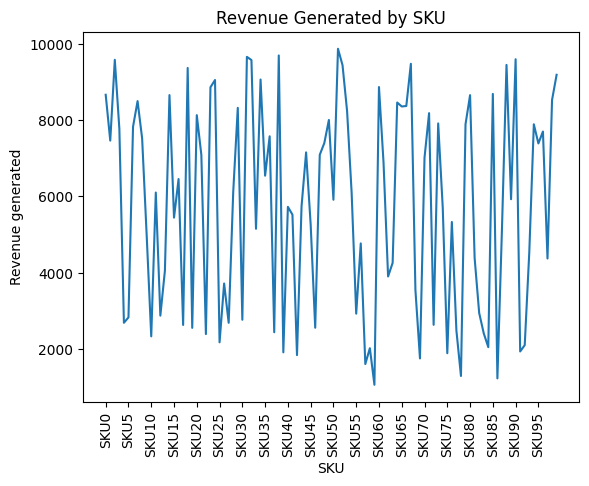

<Figure size 1500x600 with 0 Axes>

In [70]:
revenue_chart=plt.plot(df['SKU'],df['Revenue generated'])
plt.xlabel('SKU')
plt.ylabel('Revenue generated')
plt.title('Revenue Generated by SKU')

plt.xticks(np.arange(0,len(df['SKU']),n),df['SKU'][::n],rotation = 90)
plt.figure(figsize=(15,6))
plt.tight_layout()
plt.show()

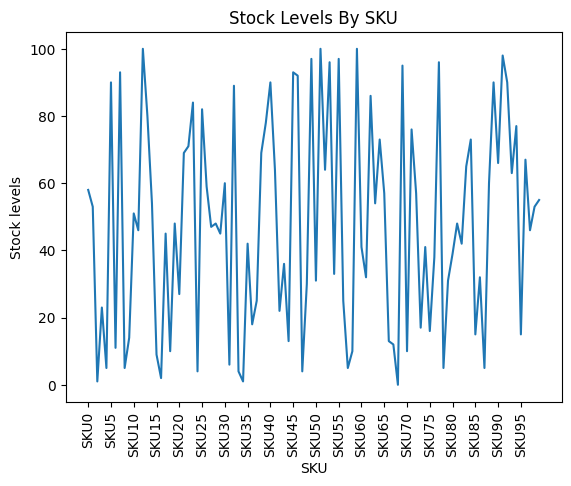

In [72]:
stock_chart = plt.plot(df['SKU'],df['Stock levels'])
plt.xlabel('SKU')
plt.ylabel('Stock levels')
plt.title('Stock Levels By SKU')
plt.xticks(np.arange(0,len(df['SKU']),n),df['SKU'][::n],rotation = 90)
plt.show()

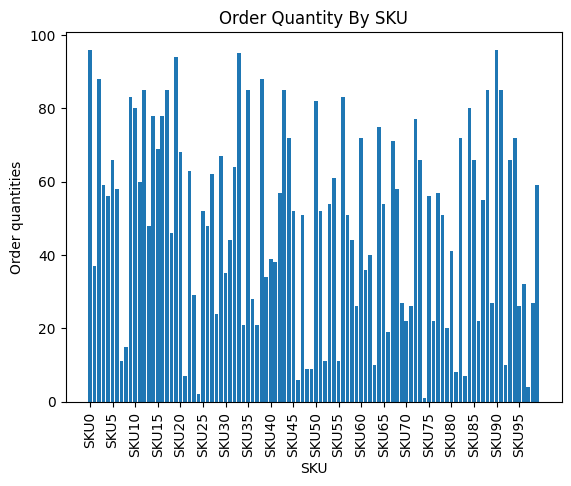

In [78]:
order_quantity_chart = plt.bar(df['SKU'],df['Order quantities'])
plt.xlabel('SKU')
plt.ylabel('Order quantities')
plt.title('Order Quantity By SKU')
plt.xticks(np.arange(0,len(df['SKU']),n),df['SKU'][::n],rotation =90)
plt.show()

COST ANALYSIS

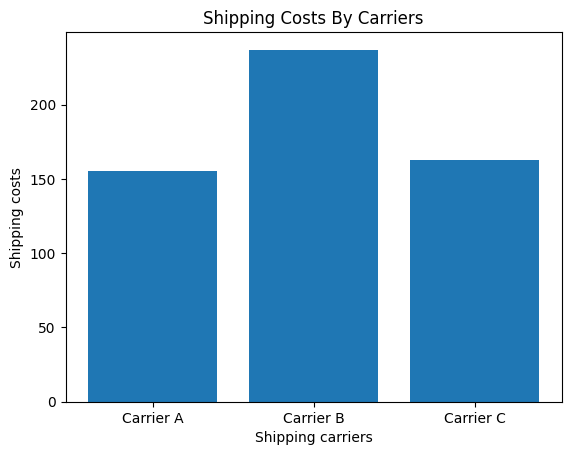

In [81]:
total_shipping_cost = df.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()
plt.bar(total_shipping_cost['Shipping carriers'],total_shipping_cost['Shipping costs'])
plt.xlabel('Shipping carriers')
plt.ylabel('Shipping costs')
plt.title('Shipping Costs By Carriers')
plt.show()

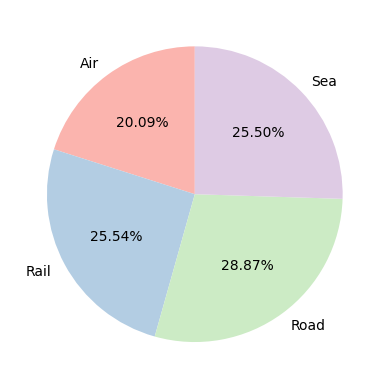

In [96]:
import matplotlib.pyplot as plt
pivot_table = pd.pivot_table(df, values='Defect rates',index=['Transportation modes'],aggfunc='mean')
cmap = plt.get_cmap('Pastel1')
transportation_chart=plt.pie(pivot_table['Defect rates'],labels=pivot_table.index,colors=cmap.colors,autopct='%1.2f%%',startangle=90)
plt.show()                            